In [312]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT

In [313]:
path = "/Users/guilhermeviveiros/Desktop/Face_Regonition/mlFacesResized/"

In [314]:
def getExtension(filename):
   fileName, fileExtension = os.path.splitext(filename)
   return fileExtension

def inArray(array, to_look):
    for x in array:
	    if(to_look[1:] == x):
		    return True

def isImage(filename):
   # Extensions to search
   extensions = ['jpeg', 'jpg', 'jpe','png'];
   extension = getExtension(filename)
   if (inArray(extensions, extension)):
       return True
   return False

In [320]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

def set_dataset(path,number_images, width, height):
    
    #o 3 vem do RGB
    train_set = np.empty(shape=(number_images,width,height,3));
    test_set = np.empty(shape=(2*5,width,height,3));
    answer_test = [];
    
    
    mlfaces = os.listdir(os.path.expanduser(
        path
    ))
    
    tmp_train_set = 0;
    tmp_test_set = 0;
    
    for user in mlfaces:
        
        if not user == ".DS_Store":
        
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            tmp = 1;
            
            
            for image in user_images:
            
                
                if(isImage(image)):
        
                    image_path = path + user + "/" + image
                    #print(image_path)
                
                    im = mpimg.imread(image_path)
                    
                    
                    if(tmp < 9):
                        train_set[tmp_train_set] = im;
                        tmp_train_set = tmp_train_set+1;
                    else : 
                        test_set[tmp_test_set] = im;
                        answer_test.append(user);
                        tmp_test_set = tmp_test_set+1;
                        
                        
                    tmp = tmp+1;     
                
        
                    
                
    return train_set,test_set,answer_test;


In [321]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

train_set,test_set,answer_test = set_dataset(path,45,255,255);

In [325]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
print(answer_test)

Train set with a shape of -> (45, 255, 255, 3)
Test set with a shape of -> (10, 255, 255, 3)
['andrade', 'andrade', 'gabi', 'gabi', 'guilherme', 'guilherme', 'rc', 'rc', 'rui', 'rui']


In [326]:
#1) calcular a matriz de covariancia

#temos que ter 45 amostras, cada amostra com a sua respeitva coluna, logo vou passar de (2048,1536,3) para (2048*1536*3)
train_set = train_set.reshape(train_set.shape[0], (train_set.shape[1]*train_set.shape[2]*train_set.shape[3]))
test_set = test_set.reshape(test_set.shape[0], (test_set.shape[1]*test_set.shape[2]*test_set.shape[3]))

In [327]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#cada amostra/linha tem todas as suas features representadas por coluna (pixeis)

Train set with a shape of -> (45, 195075)
Test set with a shape of -> (10, 195075)


In [328]:
#centralizar a matriz e fazer svd , depois valores singulares ^2 = valores proprios
means = np.mean(train_set,0)

In [329]:
#subtraio a cada atributo pela sua média
train_set = train_set - means
print(train_set.shape)

(45, 195075)


In [330]:
#quero que os vetores próprios deem -> N por M (n -> numero de elementos) (m -> atributos)
vet_prop, val_sing, v = np.linalg.svd(train_set.T,full_matrices=False)

In [331]:
val_prop = val_sing #* val_sing

In [332]:
print(vet_prop.shape)
print(val_prop.shape)
print(val_prop)

(195075, 45)
(45,)
[5.49903408e+02 4.33905810e+02 2.27380577e+02 1.66565881e+02
 1.50797200e+02 1.08013488e+02 8.54946759e+01 7.92201886e+01
 7.81973736e+01 6.82395920e+01 6.72900273e+01 6.38528953e+01
 5.90325513e+01 5.67930441e+01 5.63890857e+01 5.20271951e+01
 5.01834491e+01 4.91593792e+01 4.69761271e+01 4.35399594e+01
 4.29577259e+01 4.14525430e+01 3.98366635e+01 3.91248713e+01
 3.80425087e+01 3.64729119e+01 3.48009137e+01 3.47349397e+01
 3.38988348e+01 3.31590555e+01 3.23373170e+01 3.04792990e+01
 2.94325743e+01 2.86715081e+01 2.82246486e+01 2.76346302e+01
 2.49206445e+01 2.28754396e+01 2.16715129e+01 1.48260069e+01
 1.08434747e-13 4.29983888e-14 3.69428573e-14 3.69428573e-14
 3.69428573e-14]


In [333]:
cov = np.cov(train_set)

In [334]:
#2) ver quantos valores próprios é que são relevantes
diag = np.sum(val_prop)
confianca_alvo = 0.9
k = 0
confianca = 0
while confianca < confianca_alvo:
    confianca= confianca + (val_prop[k]/diag)
    k += 1
k, confianca

(29, 0.9059513860353624)

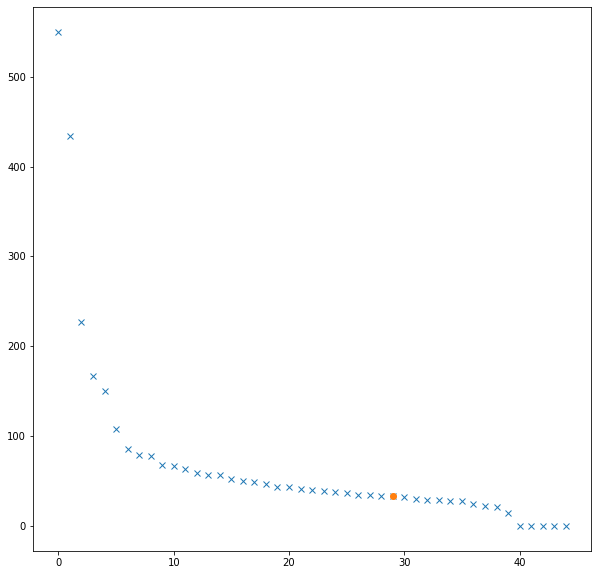

In [335]:
plt.figure(figsize=(10,10))
M = 45 #representa o número de valores próprios
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [265]:
#podemos reparar pelo método do cotovelo que com 3 vetores próprios temos uma boa representação do conjunto de imagens
#observemos em baixo os primeiros vetores próprios(aqueles que representam melhor o dataset)
print(vet_prop.shape)

(195075, 45)


<function matplotlib.pyplot.show(*args, **kw)>

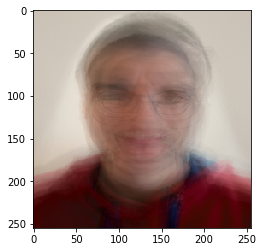

In [408]:
#display(plt.matshow(np.reshape(v[0], (255,255,3)), cmap='gray'))
from matplotlib import pyplot as PLT

PLT.imshow(np.abs(np.reshape(vet_prop[:,0],(255,255,3))*255))
PLT.show

In [337]:
W = vet_prop[0:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]

In [338]:
print(W.shape)
print(train_set.shape)

(195075, 29)
(45, 195075)


In [339]:
train_setT = train_set.T

In [340]:
projecao_interna = np.dot(train_set,W)
print(projecao_interna.shape)

(45, 29)


In [341]:
test_set = test_set - means
print(test_set.shape)

(10, 195075)


In [342]:
projecao_test = np.dot(test_set, W)
print(projecao_test.shape)

(10, 29)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


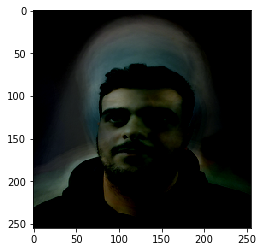

In [399]:
#I will test with this image
#fica assim porque os pixeis estão centrados
plt.imshow(test_set[9].reshape(255,255,3))

In [364]:
dist = np.zeros(shape=(10,45))
d_min = np.zeros(shape=(10))

for i in range(0,test_set.shape[0]-1):
    dist[i] = [np.linalg.norm(projecao_interna[l] - projecao_test[i]) for l in range(45)]
    d_min[i] = np.min(dist[i])

In [365]:
d_min

array([21.23317489, 32.98346737, 14.29720561, 20.55320685,  9.58118725,
       16.96600809, 53.86561415, 42.56575066, 36.70501791,  0.        ])

In [366]:
len(dist) #45 pontos relativos à imagem

10

In [383]:
ind = [np.argmin(x) for x in dist]
ind
#diz o índice do elemento mínimo correspondentes à distancia

[1, 5, 14, 12, 17, 19, 31, 26, 33, 0]

In [394]:
#Com este indice consigo ver qual o elemento
def ind_to_name(ind):
    ind = ind+1;
    if ind < 9  :
        tmp = "andrade"
        #break;
    elif ind < 17:
        tmp = "gabi"
        #break;
    elif ind < 25:
        tmp = "guilherme"
        #break;
    elif ind < 33:
        tmp = "rc"
        #break;
    elif ind < 41:
        tmp = "rui"
        #break;
    else:
       print("Não reconhecemos")
    return tmp

In [395]:
tmp = 1
for i in range(0,len(ind)):
    name = ind_to_name(ind[i])
    
    if(name == answer_test[i]):
        print("Image " + str(tmp) + " is ok!")
    else:
        print("Image " + str(tmp) + " isnt ok!")
        print("Image of -> " + str(answer_test[i]))
        print("Predicted -> " + name)
    
    tmp+=1


Image 1 is ok!
Image 2 is ok!
Image 3 is ok!
Image 4 is ok!
Image 5 is ok!
Image 6 is ok!
Image 7 is ok!
Image 8 is ok!
Image 9 is ok!
Image 10 isnt ok!
Image of -> rui
Predicted -> andrade
